# Data Load and Preparation

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [2]:
#import sales csv
sales = pd.read_csv('cleaned_sales.csv')
census = pd.read_csv('cleaned_census.csv')

In [3]:
census = census.drop(['Unnamed: 0'], axis=1)
census_subset = census[['ZCTA','Average Household Size', 'Median Age', 'Percent Bachelors Deg' , 'Percent Graduate Deg', 'Median Mortgage', 'Mean Income', 'Percent 65 and Over', 'Percent White']]
census_subset['ZCTA'] = census_subset['ZCTA'].astype(str)

C:\Users\julie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
sales['Practice Area'].value_counts()

Estate Planning                   207
Estate Administration              42
Estate Admin - Package             24
Estate Admin - Hourly              19
Business                           14
Medicaid                           11
Business - Package                  7
Estate Admin - Partial              6
Real Estate                         6
Business - LLC                      5
Guardianship                        4
Business - Hourly                   3
Trust Administration                3
Estate Admin - SEP                  3
Non Profit                          2
Medicaid - Hourly                   2
Estate Administration - Hourly      1
Real Estate - Deed                  1
POA Agent Rep                       1
Medicaid - Package                  1
Name: Practice Area, dtype: int64

In [5]:
sales.loc[sales['Practice Area'].str.contains('Estate Admin'), 'Practice Area'] = 'Estate Admin'
sales.loc[sales['Practice Area'].str.contains('Business'), 'Practice Area'] = 'Business'
sales.loc[sales['Practice Area'].str.contains('Medicaid'), 'Practice Area'] = 'Medicaid'
sales.loc[(sales['Practice Area'] != 'Estate Admin') &
           (sales['Practice Area'] !='Estate Planning')  &
          (sales['Practice Area'] !='Business')  &
           (sales['Practice Area']!='Medicaid'), 'Practice Area'] = 'Other'

sales['Practice Area'].value_counts()

Estate Planning    207
Estate Admin        95
Business            29
Other               17
Medicaid            14
Name: Practice Area, dtype: int64

In [6]:
#join on zip
joined = sales.merge(census_subset, left_on='Zip', right_on='ZCTA')

#create column for bachelors and graduate degrees
joined['Degree'] = joined['Percent Bachelors Deg'].astype(float) + joined['Percent Graduate Deg'].astype(float)

#one-hot encoding of practice area
dummies = pd.get_dummies(joined['Practice Area'])

#remove unneeded columns
joined = joined.drop(['Unnamed: 0', 'Percent Bachelors Deg',  'Percent Graduate Deg', 
                      'City', 'State', 'Zip', 'ZCTA', 'Contact Year', 'Practice Area', 'Referral'],axis=1)
joined['Median Mortgage'] = joined['Median Mortgage'].str.replace('+','').str.replace(',','')

#concat all columns and remove rows with no fee
joined = pd.concat([joined,dummies],axis=1).dropna().reset_index(drop=True)

C:\Users\julie\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  del sys.path[0]


In [7]:
numeric = joined[['Fee', 'Average Household Size', 'Median Age',
       'Median Mortgage', 'Mean Income', 'Percent 65 and Over',
       'Percent White', 'Degree']].apply(pd.to_numeric)
categoric = joined[['Contact Month','Business', 'Estate Admin',
       'Estate Planning','Medicaid', 'Other']]

df = pd.concat([categoric, numeric], axis=1)

In [8]:
#df[['Fee', 'Average Household Size', 'Median Age',
#       'Median Mortgage', 'Mean Income', 'Percent 65 and Over',
#       'Percent White', 'Degree']].describe()

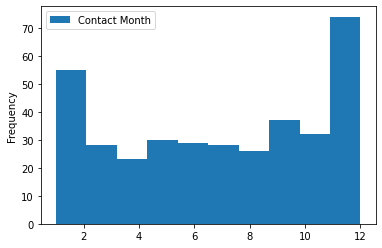

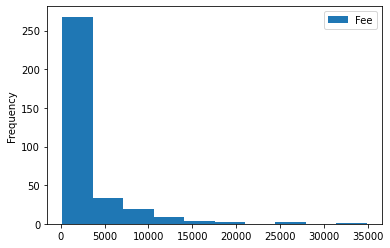

In [9]:
import matplotlib.pyplot as plt

ax = sales[['Contact Month']].plot.hist()
plt.show()

ax = sales[['Fee']].plot.hist()
plt.show()

<AxesSubplot:>

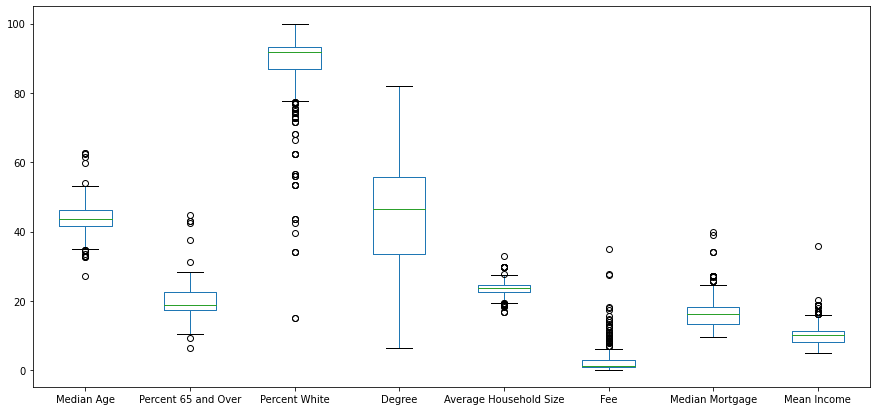

In [10]:
plotting_df = df.copy()
plotting_df['Mean Income'] = df['Mean Income']/10000
plotting_df['Fee'] = df['Fee']/1000
plotting_df['Median Mortgage'] = df['Median Mortgage']/100
plotting_df['Average Household Size'] = df['Average Household Size']*10
plotting_df[['Median Age','Percent 65 and Over',
       'Percent White', 'Degree','Average Household Size','Fee', 'Median Mortgage', 'Mean Income']].plot.box(figsize=(15,7))

In [11]:
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric), columns=numeric.columns)

# Concatenate categoric and scaled numeric columns
scaled_DF = pd.concat([categoric, numeric_scaled], axis=1)
scaled_DF


,Contact Month,Business,Estate Admin,Estate Planning,Medicaid,Other,Fee,Average Household Size,Median Age,Median Mortgage,Mean Income,Percent 65 and Over,Percent White,Degree
0,11,0,0,1,0,0,-0.508218,-0.608418,0.535237,-0.755245,-0.712592,0.672619,-0.779247,-0.228850
1,11,0,1,0,0,0,-0.460481,-0.608418,0.535237,-0.755245,-0.712592,0.672619,-0.779247,-0.228850
2,10,0,1,0,0,0,-0.460481,-0.608418,0.535237,-0.755245,-0.712592,0.672619,-0.779247,-0.228850
3,11,0,1,0,0,0,1.425138,-0.608418,0.535237,-0.755245,-0.712592,0.672619,-0.779247,-0.228850
4,1,0,0,1,0,0,-0.269532,0.047668,0.412076,-0.358359,0.368350,-0.453717,0.556960,0.269309
5,1,0,0,1,0,0,-0.460481,0.047668,0.412076,-0.358359,0.368350,-0.453717,0.556960,0.269309
6,5,0,0,1,0,0,0.136234,0.485058,0.165752,-0.005570,0.064195,0.178612,0.372655,0.556979
7,5,1,0,0,0,0,-0.496284,0.485058,0.165752,-0.005570,0.064195,0.178612,0.372655,0.556979
8,12,1,0,0,0,0,-0.496284,0.485058,0.165752,-0.005570,0.064195,0.178612,0.372655,0.556979
9,8,0,0,1,0,0,-0.460481,0.485058,0.165752,-0.005570,0.064195,0.178612,0.372655,0.556979


# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_DF)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
pca.explained_variance_ratio_

array([0.59442492, 0.15070333])

# K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Import module
from sklearn.cluster import KMeans

# Instantiate
kmeans = KMeans(n_clusters=4, random_state=123)

# Fit
fit = kmeans.fit(scaled_DF)

# Print inertia
print("Sum of squared distances for 4 clusters is", kmeans.inertia_)

Sum of squared distances for 4 clusters is 2842.8272368509147


In [16]:
cluster_score = []
for k in range(1,15):
    k_means_model = KMeans(n_clusters=k)
    k_means_model.fit(scaled_DF)
    cluster_score.append(k_means_model.inertia_)

C:\Users\julie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


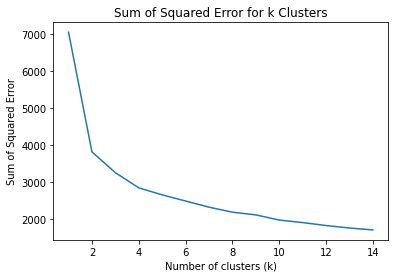

In [17]:
plt.plot(range(1,15), cluster_score, '-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error')
plt.title('Sum of Squared Error for k Clusters')
plt.show()

In [18]:
k_means_model = KMeans(n_clusters=4, random_state=1)
k_means_model.fit(scaled_DF)
scaled_DF['k_means_values']=k_means_model.predict(scaled_DF)
scaled_DF_x = scaled_DF.copy()
scaled_DF_x = scaled_DF_x.drop('k_means_values', axis=1)

In [19]:
finalDf = pd.concat([principalDf, scaled_DF['k_means_values']], axis = 1)

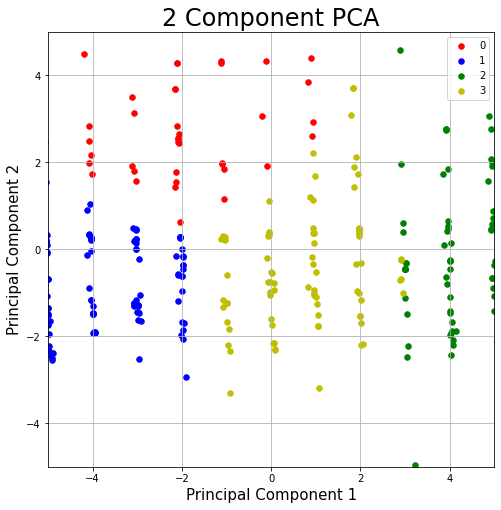

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 24)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
cluster = [0,1,2,3]
color = ['r', 'b', 'g','y']
for cluster, color in zip(cluster,color):
    clusInd = finalDf['k_means_values'] == cluster
    ax.scatter(finalDf.loc[clusInd, 'principal component 1']
               , finalDf.loc[clusInd, 'principal component 2']
               , c = color
               , s = 30)
ax.legend([0,1,2,3])
ax.grid()
plt.show()

In [21]:
df_with_clusters = pd.concat([df, scaled_DF['k_means_values']], axis = 1)

In [22]:
df_with_clusters[df_with_clusters['k_means_values']==0].describe()

,Contact Month,Business,Estate Admin,Estate Planning,Medicaid,Other,Fee,Average Household Size,Median Age,Median Mortgage,Mean Income,Percent 65 and Over,Percent White,Degree,k_means_values
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,9.159091,0.113636,0.340909,0.500000,0.022727,0.022727,5609.625000,2.592273,41.290909,2416.840909,159112.840909,15.697727,84.377273,63.729545,0.0
std,1.724558,0.321038,0.479495,0.505781,0.150756,0.150756,7888.049783,0.313538,3.850691,507.350892,40947.797211,3.932304,13.687048,9.346970,0.0
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.690000,32.900000,1552.000000,85565.000000,6.300000,42.400000,33.300000,0.0
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,2.440000,40.100000,2083.000000,135569.750000,11.700000,80.150000,59.000000,0.0
50%,9.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1800.000000,2.630000,41.900000,2271.000000,166720.000000,16.550000,89.800000,66.150000,0.0
75%,10.250000,0.000000,1.000000,1.000000,0.000000,0.000000,6500.000000,2.740000,43.700000,2706.000000,171881.500000,18.800000,93.100000,68.525000,0.0
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34885.000000,3.290000,49.400000,4000.000000,358261.000000,24.900000,95.900000,82.000000,0.0


In [23]:
cluster1 = df_with_clusters[df_with_clusters['k_means_values']==0].describe().loc['mean',:]

In [24]:
cluster2 = df_with_clusters[df_with_clusters['k_means_values']==1].describe().loc['mean',:]

In [25]:
cluster3 = df_with_clusters[df_with_clusters['k_means_values']==2].describe().loc['mean',:]

In [26]:
cluster4 = df_with_clusters[df_with_clusters['k_means_values']==3].describe().loc['mean',:]

<AxesSubplot:>

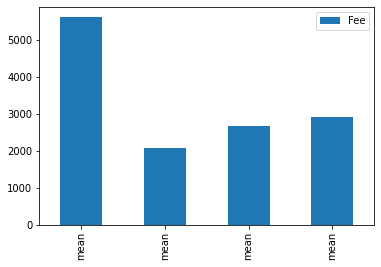

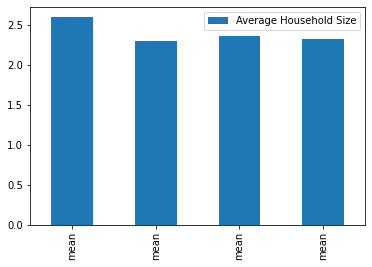

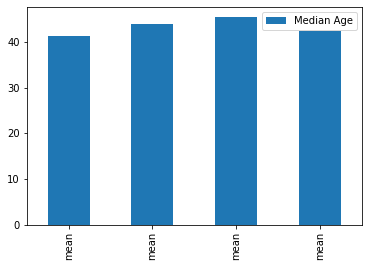

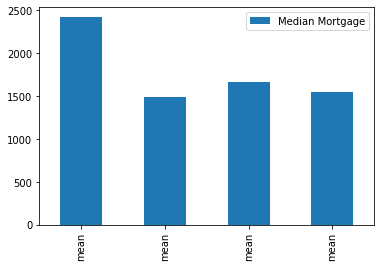

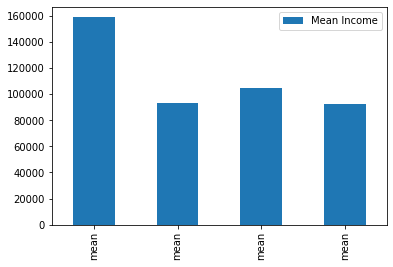

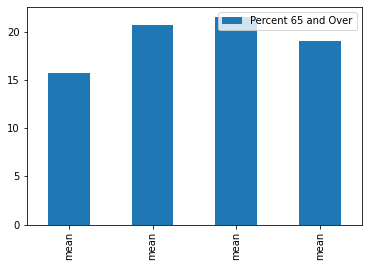

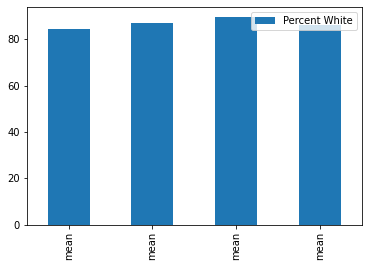

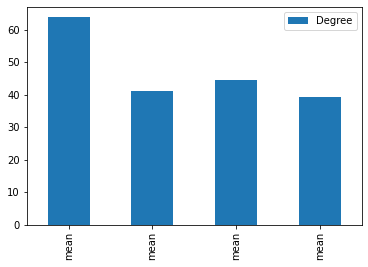

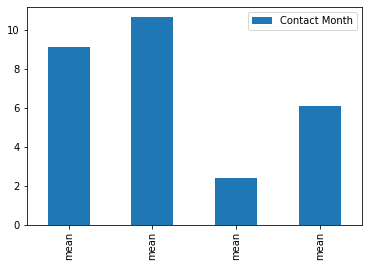

In [27]:
list_of_series = [cluster1,cluster2,cluster3,cluster4]
cluster_df = pd.DataFrame(list_of_series)
cluster_df[['Fee']].plot.bar()
cluster_df[['Average Household Size']].plot.bar()
cluster_df[['Median Age']].plot.bar()
cluster_df[['Median Mortgage']].plot.bar()
cluster_df[['Mean Income']].plot.bar()
cluster_df[['Percent 65 and Over']].plot.bar()
cluster_df[['Percent White']].plot.bar()
cluster_df[['Degree']].plot.bar()
cluster_df[['Contact Month']].plot.bar()

In [28]:
cluster_df

,Contact Month,Business,Estate Admin,Estate Planning,Medicaid,Other,Fee,Average Household Size,Median Age,Median Mortgage,Mean Income,Percent 65 and Over,Percent White,Degree,k_means_values
mean,9.159091,0.113636,0.340909,0.500000,0.022727,0.022727,5609.625000,2.592273,41.290909,2416.840909,159112.840909,15.697727,84.377273,63.729545,0.0
mean,10.660550,0.082569,0.211009,0.623853,0.009174,0.073394,2073.577982,2.295138,43.905505,1490.532110,93246.724771,20.657798,87.100917,41.125688,1.0
mean,2.408602,0.075269,0.215054,0.634409,0.043011,0.032258,2681.236559,2.356344,45.386022,1659.139785,105114.688172,21.476344,89.393548,44.556989,2.0
mean,6.125000,0.034091,0.340909,0.488636,0.079545,0.056818,2910.971591,2.324659,42.460227,1544.215909,92775.931818,19.002273,86.215909,39.238636,3.0


In [29]:
cluster1_areas = df_with_clusters[df_with_clusters['k_means_values']==0][['Estate Planning', 'Estate Admin', 'Medicaid', 'Business','Other']].sum()/df_with_clusters[df_with_clusters['k_means_values']==0].shape[0]
cluster1_areas

Estate Planning    0.500000
Estate Admin       0.340909
Medicaid           0.022727
Business           0.113636
Other              0.022727
dtype: float64

In [30]:
cluster2_areas = df_with_clusters[df_with_clusters['k_means_values']==1][['Estate Planning', 'Estate Admin', 'Medicaid', 'Business','Other']].sum()/df_with_clusters[df_with_clusters['k_means_values']==1].shape[0]
cluster2_areas

Estate Planning    0.623853
Estate Admin       0.211009
Medicaid           0.009174
Business           0.082569
Other              0.073394
dtype: float64

In [31]:
cluster3_areas = df_with_clusters[df_with_clusters['k_means_values']==2][['Estate Planning', 'Estate Admin', 'Medicaid', 'Business','Other']].sum()/df_with_clusters[df_with_clusters['k_means_values']==2].shape[0]
cluster3_areas

Estate Planning    0.634409
Estate Admin       0.215054
Medicaid           0.043011
Business           0.075269
Other              0.032258
dtype: float64

In [32]:
cluster4_areas = df_with_clusters[df_with_clusters['k_means_values']==3][['Estate Planning', 'Estate Admin', 'Medicaid', 'Business','Other']].sum()/df_with_clusters[df_with_clusters['k_means_values']==3].shape[0]
cluster4_areas

Estate Planning    0.488636
Estate Admin       0.340909
Medicaid           0.079545
Business           0.034091
Other              0.056818
dtype: float64